In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, SGDRegressor, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor,AdaBoostRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
 
from tpot import TPOTRegressor
    
    
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
import zipfile
sample_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip')
train_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/train.zip')
test_zip = zipfile.ZipFile('/kaggle/input/nyc-taxi-trip-duration/test.zip')

train_df = pd.read_csv(train_zip.open("train.csv"))
test_df = pd.read_csv(test_zip.open("test.csv"))
sample_df = pd.read_csv(sample_zip.open("sample_submission.csv"))

In [3]:
train = train_df.copy()
test = test_df.copy()

In [4]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [5]:
train_id = train[["id"]]
test_id = test[["id"]]

In [6]:
train=train.set_index("id")

In [7]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764


In [8]:
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [9]:
train["month"] = train["pickup_datetime"].dt.month
train["day"] = train["pickup_datetime"].dt.day
train["hour"] = train["pickup_datetime"].dt.hour
train["minute"] = train["pickup_datetime"].dt.minute
train["second"] = train["pickup_datetime"].dt.second

In [10]:
test["month"] = test["pickup_datetime"].dt.month
test["day"] = test["pickup_datetime"].dt.day
test["hour"] = test["pickup_datetime"].dt.hour
test["minute"] = test["pickup_datetime"].dt.minute
test["second"] = test["pickup_datetime"].dt.second

In [11]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second
id,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,3,14,17,24,55
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,12,0,43,35
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,19,11,35,24
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,4,6,19,32,31
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,4,8,13,31,4
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,1,10,7,35,15
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,4,22,6,57,41


In [12]:
train["passenger_count"].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [13]:
# train=train[train["passenger_count"]<=7]
# train=train[train["passenger_count"]!=0]

In [14]:
# train

In [15]:
encoder = LabelEncoder()
train["store_and_fwd_flag"] = encoder.fit_transform(train["store_and_fwd_flag"])
test["store_and_fwd_flag"] = encoder.transform(test["store_and_fwd_flag"])

In [16]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second
id,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,24,55
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,43,35
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,19,11,35,24
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,32,31
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,8,13,31,4
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,10,7,35,15
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,22,6,57,41


In [17]:
encoder1 = LabelEncoder()
train["vendor_id"] = encoder.fit_transform(train["vendor_id"])
test["vendor_id"] = encoder.transform(test["vendor_id"])

In [18]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second
id,,,,,,,,,,,,,,,
id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,14,17,24,55
id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,12,0,43,35
id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,19,11,35,24
id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,6,19,32,31
id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,4,8,13,31,4
id1049543,0,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,1,10,7,35,15
id2304944,1,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,4,22,6,57,41


In [19]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered[column]

In [20]:
train.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'month',
       'day', 'hour', 'minute', 'second'],
      dtype='object')

In [21]:
for i in ['vendor_id', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'month',
       'day', 'hour', 'minute', 'second']:
    train[i] = remove_outliers(train, i)

In [22]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second
id,,,,,,,,,,,,,,,
id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,0.0,455,3,14,17,24,55
id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,0.0,663,6,12,0,43,35
id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,0.0,2124,1,19,11,35,24
id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,0.0,429,4,6,19,32,31
id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,0.0,435,3,26,13,30,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,2016-04-08 13:31:04,2016-04-08 13:44:02,NaN,-73.982201,40.745522,-73.994911,40.740170,0.0,778,4,8,13,31,4
id1049543,0,2016-01-10 07:35:15,2016-01-10 07:46:10,1.0,-74.000946,40.747379,-73.970184,40.796547,0.0,655,1,10,7,35,15
id2304944,1,2016-04-22 06:57:41,2016-04-22 07:10:25,1.0,-73.959129,40.768799,-74.004433,40.707371,0.0,764,4,22,6,57,41


In [23]:
for i in ['vendor_id', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'month',
       'day', 'hour', 'minute', 'second']:
    print(i)
    print(train[i].value_counts())

vendor_id
vendor_id
1    780302
0    678342
Name: count, dtype: int64
passenger_count
passenger_count
1.0    1033540
2.0     210318
3.0      59896
0.0         60
Name: count, dtype: int64
pickup_longitude
pickup_longitude
-73.982201    633
-73.982140    607
-73.982101    587
-73.982117    585
-73.982224    584
             ... 
-74.024330      1
-74.019440      1
-74.025360      1
-74.019234      1
-74.021103      1
Name: count, Length: 11568, dtype: int64
pickup_latitude
pickup_latitude
40.774101    414
40.774090    411
40.774120    410
40.774109    392
40.774078    390
            ... 
40.695026      1
40.699741      1
40.698853      1
40.699051      1
40.696651      1
Name: count, Length: 31723, dtype: int64
dropoff_longitude
dropoff_longitude
-73.982330    443
-73.982094    433
-73.982246    430
-73.982117    427
-73.991379    420
             ... 
-74.033646      1
-74.026108      1
-74.031548      1
-74.024117      1
-74.024200      1
Name: count, Length: 13892, dtype: int64
drop

In [24]:
import pandas as pd
import math

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 

    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [25]:
train['distance'] = train.apply(lambda row: haversine(row['pickup_longitude'],row['pickup_latitude'],
                                                      row['dropoff_longitude'],row['dropoff_latitude']),
                                axis=1)

In [26]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
id,,,,,,,,,,,,,,,,
id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,0.0,455,3,14,17,24,55,1.498521
id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,0.0,663,6,12,0,43,35,1.805507
id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,0.0,2124,1,19,11,35,24,6.385098
id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,0.0,429,4,6,19,32,31,1.485498
id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,0.0,435,3,26,13,30,55,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,2016-04-08 13:31:04,2016-04-08 13:44:02,NaN,-73.982201,40.745522,-73.994911,40.740170,0.0,778,4,8,13,31,4,1.225080
id1049543,0,2016-01-10 07:35:15,2016-01-10 07:46:10,1.0,-74.000946,40.747379,-73.970184,40.796547,0.0,655,1,10,7,35,15,6.049836
id2304944,1,2016-04-22 06:57:41,2016-04-22 07:10:25,1.0,-73.959129,40.768799,-74.004433,40.707371,0.0,764,4,22,6,57,41,7.824606


In [27]:
train["distance"].max(), train["distance"].min()

(14.949222613563663, 0.0)

In [28]:
# train = train[train["distance"]!=0.0]

In [29]:
# train["distance"].max(), train["distance"].min()

In [30]:
train["distance"] = remove_outliers(train, "distance")

In [31]:
train = train.dropna()

In [32]:
train

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
id,,,,,,,,,,,,,,,,
id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,0.0,455,3,14,17,24,55,1.498521
id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,0.0,663,6,12,0,43,35,1.805507
id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,0.0,429,4,6,19,32,31,1.485498
id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,0.0,435,3,26,13,30,55,1.188588
id1324603,1,2016-05-21 07:54:58,2016-05-21 08:20:49,1.0,-73.969276,40.797779,-73.922470,40.760559,0.0,1551,5,21,7,54,58,5.714981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id3445276,0,2016-04-03 13:51:25,2016-04-03 14:07:37,2.0,-73.989075,40.730465,-73.963882,40.773739,0.0,972,4,3,13,51,25,5.258989
id3027038,1,2016-05-19 14:46:55,2016-05-19 14:50:52,1.0,-73.985390,40.763020,-73.989708,40.767502,0.0,237,5,19,14,46,55,0.616982
id1920898,0,2016-04-17 18:48:16,2016-04-17 19:00:56,1.0,-73.975357,40.751705,-73.949478,40.776764,0.0,760,4,17,18,48,16,3.537555


In [33]:
train["distance"].max(), train["distance"].min()

(5.918051674883332, 0.0)

In [34]:
test['distance'] = test.apply(lambda row: haversine(row['pickup_longitude'],row['pickup_latitude'],
                                                      row['dropoff_longitude'],row['dropoff_latitude']),
                                axis=1)

In [35]:
for i in test.columns:
    print(i)
    print(test[i].isnull().value_counts())

id
id
False    625134
Name: count, dtype: int64
vendor_id
vendor_id
False    625134
Name: count, dtype: int64
pickup_datetime
pickup_datetime
False    625134
Name: count, dtype: int64
passenger_count
passenger_count
False    625134
Name: count, dtype: int64
pickup_longitude
pickup_longitude
False    625134
Name: count, dtype: int64
pickup_latitude
pickup_latitude
False    625134
Name: count, dtype: int64
dropoff_longitude
dropoff_longitude
False    625134
Name: count, dtype: int64
dropoff_latitude
dropoff_latitude
False    625134
Name: count, dtype: int64
store_and_fwd_flag
store_and_fwd_flag
False    625134
Name: count, dtype: int64
month
month
False    625134
Name: count, dtype: int64
day
day
False    625134
Name: count, dtype: int64
hour
hour
False    625134
Name: count, dtype: int64
minute
minute
False    625134
Name: count, dtype: int64
second
second
False    625134
Name: count, dtype: int64
distance
distance
False    625134
Name: count, dtype: int64


In [36]:
train = train.drop(columns=["dropoff_datetime","pickup_datetime",
                            'pickup_longitude', 'pickup_latitude',
                            'dropoff_longitude', 'dropoff_latitude'])

In [37]:
train

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,month,day,hour,minute,second,distance
id,,,,,,,,,,
id2875421,1,1.0,0.0,455,3,14,17,24,55,1.498521
id2377394,0,1.0,0.0,663,6,12,0,43,35,1.805507
id3504673,1,1.0,0.0,429,4,6,19,32,31,1.485498
id2181028,1,1.0,0.0,435,3,26,13,30,55,1.188588
id1324603,1,1.0,0.0,1551,5,21,7,54,58,5.714981
...,...,...,...,...,...,...,...,...,...,...
id3445276,0,2.0,0.0,972,4,3,13,51,25,5.258989
id3027038,1,1.0,0.0,237,5,19,14,46,55,0.616982
id1920898,0,1.0,0.0,760,4,17,18,48,16,3.537555


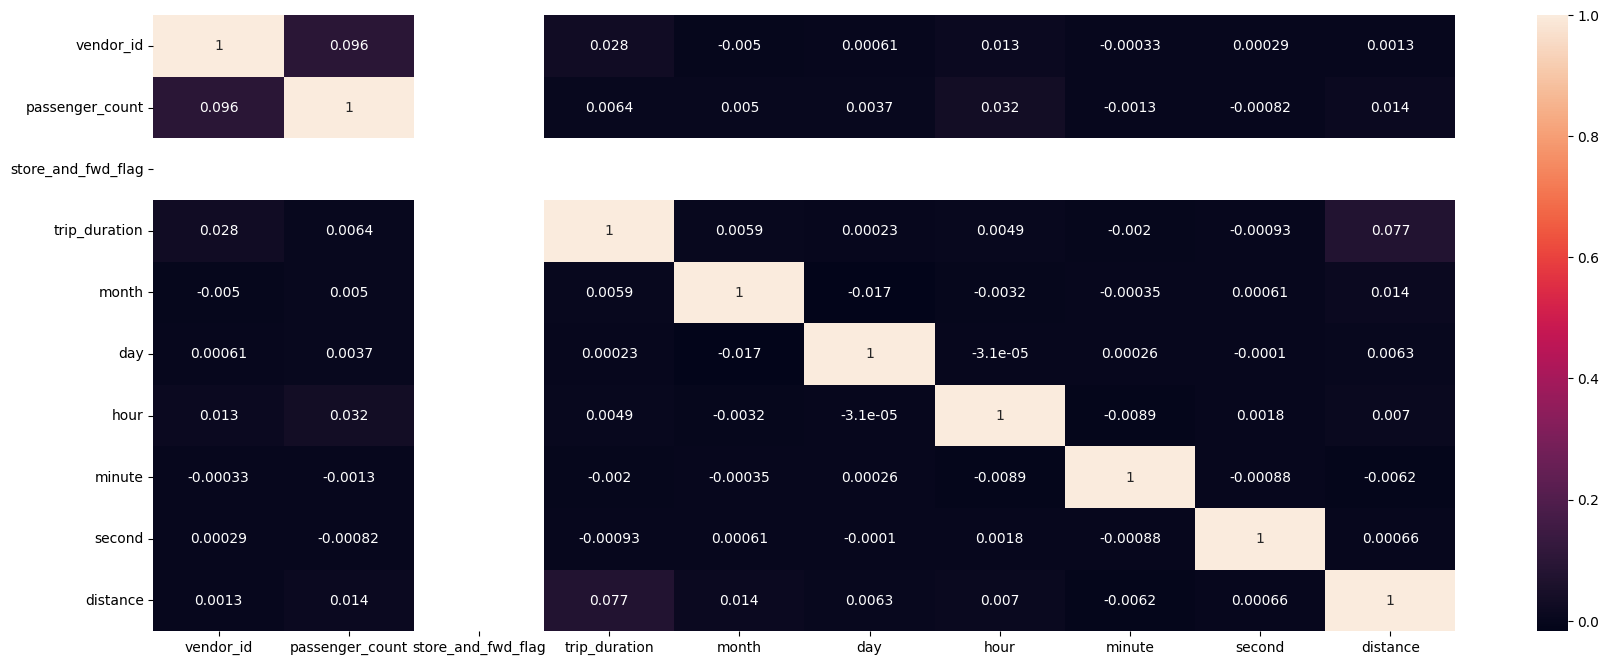

In [38]:
plt.figure(figsize=(21,8))
sns.heatmap(train.corr(), annot=True, )
plt.show()

In [39]:
X = train.drop(columns="trip_duration")
y = train[["trip_duration"]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
linear = LinearRegression()

linear.fit(X_train,y_train)
print(f"Training score {linear.score(X_train,y_train)}")
y_pred = linear.predict(X_test)
print(f"R2: {r2_score(y_test,y_pred)}")

Training score 0.006166446524142
R2: 0.010007524436755011


In [42]:
cat_model = CatBoostRegressor()
cat_model.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(f"Training score {cat_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")

Learning rate set to 0.119037
0:	learn: 3765.4763258	total: 140ms	remaining: 2m 19s
1:	learn: 3763.2813529	total: 216ms	remaining: 1m 47s
2:	learn: 3761.6161060	total: 282ms	remaining: 1m 33s
3:	learn: 3760.3844790	total: 355ms	remaining: 1m 28s
4:	learn: 3759.2639298	total: 424ms	remaining: 1m 24s
5:	learn: 3758.3740501	total: 493ms	remaining: 1m 21s
6:	learn: 3757.6821410	total: 561ms	remaining: 1m 19s
7:	learn: 3757.0965223	total: 631ms	remaining: 1m 18s
8:	learn: 3756.4553466	total: 700ms	remaining: 1m 17s
9:	learn: 3756.1277625	total: 764ms	remaining: 1m 15s
10:	learn: 3755.8724231	total: 832ms	remaining: 1m 14s
11:	learn: 3755.6493668	total: 903ms	remaining: 1m 14s
12:	learn: 3755.4132794	total: 978ms	remaining: 1m 14s
13:	learn: 3755.1619454	total: 1.04s	remaining: 1m 13s
14:	learn: 3754.9132402	total: 1.11s	remaining: 1m 13s
15:	learn: 3754.7350219	total: 1.18s	remaining: 1m 12s
16:	learn: 3754.6036308	total: 1.25s	remaining: 1m 12s
17:	learn: 3754.4984089	total: 1.32s	remainin

In [43]:
xg_model = XGBRegressor()
xg_model.fit(X_train, y_train)

y_pred = xg_model.predict(X_test)
print(f"Training score {xg_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")

Training score 0.3177031569297245
R2: -0.22605592810197006


In [44]:
LG_model = LGBMRegressor()
LG_model.fit(X_train, y_train)

y_pred = LG_model.predict(X_test)
print(f"Training score {LG_model.score(X_train,y_train)}")
print(f"R2: {r2_score(y_test,y_pred)}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 858136, number of used features: 8
[LightGBM] [Info] Start training from score 765.883577
Training score 0.11306162127734354
R2: -0.00835782302298993


In [45]:
test = test.drop(columns="pickup_datetime")

In [46]:
test = test.set_index("id")

In [47]:
test = test.drop(columns=['pickup_longitude', 'pickup_latitude',
                            'dropoff_longitude', 'dropoff_latitude'])

In [50]:
cat_model = CatBoostRegressor()
cat_model.fit(X, y)

y_pred = cat_model.predict(test)
print(f"Training score {cat_model.score(X,y)}")


Learning rate set to 0.123309
0:	learn: 3624.0853641	total: 94.3ms	remaining: 1m 34s
1:	learn: 3621.8703277	total: 184ms	remaining: 1m 31s
2:	learn: 3619.9758266	total: 270ms	remaining: 1m 29s
3:	learn: 3618.7165964	total: 355ms	remaining: 1m 28s
4:	learn: 3617.6055626	total: 445ms	remaining: 1m 28s
5:	learn: 3616.6794938	total: 530ms	remaining: 1m 27s
6:	learn: 3615.9946541	total: 612ms	remaining: 1m 26s
7:	learn: 3615.3609577	total: 699ms	remaining: 1m 26s
8:	learn: 3614.6810329	total: 784ms	remaining: 1m 26s
9:	learn: 3614.3567482	total: 866ms	remaining: 1m 25s
10:	learn: 3614.0956191	total: 956ms	remaining: 1m 25s
11:	learn: 3613.8866887	total: 1.04s	remaining: 1m 25s
12:	learn: 3613.6817877	total: 1.13s	remaining: 1m 25s
13:	learn: 3613.4888696	total: 1.21s	remaining: 1m 25s
14:	learn: 3613.3068700	total: 1.3s	remaining: 1m 25s
15:	learn: 3613.1432990	total: 1.38s	remaining: 1m 25s
16:	learn: 3613.0172349	total: 1.47s	remaining: 1m 25s
17:	learn: 3612.9227859	total: 1.55s	remainin

In [49]:
# xg_model = XGBRegressor()
# xg_model.fit(X, y)

# y_pred = xg_model.predict(test)
# print(f"Training score {xg_model.score(X,y)}")

Training score 0.20712265938129693


In [217]:
output = test_id
output["trip_duration"] = pd.DataFrame(y_pred)
output = output.set_index("id")


/tmp/ipykernel_33/2526334210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["trip_duration"] = pd.DataFrame(y_pred)


In [219]:
output.to_csv("trip_duration_XG2.csv")